### Class 3 Lab

Approximate Time:  30-40 minutes

**Your Instructions**:  Now that we've submitted two different baseline versions of our model, see if you can go ahead and find some improvements to be made.  

Some ideas to try out:

 - Adding in new variables, like Age, Fare, Embarked, etc, and see how they do.  
 - Transforming variables like Name, Cabin, and possibly Ticket to make them more manageable and easy to discern
 - Creating variables to test whether or not someone was alone, whether or not they were traveling in a group (can use Ticket for this), etc
 - Random Forests need good values to split on.  Sometimes they perform better if you 'bin' a quantitative column so there are more values on each side of a split.  
 - Try out different versions of alpha, l1 & l2 penalties for LogisticRegression
 - Try different parameters of a Random Forest as well to see if it fits better
 - Make sure to use cross-validation to make comparisons between your validation and test sets

Some things to keep in mind:

 - There are missing values in the Fare, Age, Embarked and Cabin column
 - Remember the rules for transforming categorical data:
   - Ordinal: encode them with increasing numeric values to represent the hierarchy that's already in play
   - Nominal: dummy encode them like we did in the previous exercise
 - See if you can use the transform method to fill in the missing values for Age according to passenger characteristics
   


In [35]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [36]:
train = pd.read_csv('../data/titanic/train.csv')
test = pd.read_csv('../data/titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
X_train = train.loc[:,['Sex', 'Pclass']]
y_train = train['Survived']
X_test = test.loc[:,['Sex', 'Pclass']]

In [5]:
X_train.head()

,Sex,Pclass
0,male,3
1,female,1
2,female,3
3,female,1
4,male,3


In [16]:
train.Age.isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [21]:
train.Fare.isnull().value_counts()

False    891
Name: Fare, dtype: int64

In [24]:
logreg = LogisticRegression(solver = 'liblinear')

In [28]:
X_train = pd.get_dummies(X_train, columns = ['Sex', 'Pclass'], drop_first = True)
X_test = pd.get_dummies(X_test, columns = ['Sex', 'Pclass'], drop_first = True)

In [29]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [30]:
logreg = LogisticRegression(solver = 'liblinear',penalty = 'l1' )

In [31]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
logreg_l1 = pd.DataFrame({
    'PassengerId': test.PassengerId,
    'Survived': logreg.predict(X_test)
})

In [33]:
logreg_l1.to_csv('/Users/wzhang/GeneralAssembly/DAT-06-24/class material/Unit 3/Lesson 15/titanic/logreg_l1.csv',
                     index = False)

In [34]:
######

In [63]:
X_train = train.loc[:,['Sex', 'Pclass','Fare']]
y_train = train['Survived']
X_test = test.loc[:,['Sex', 'Pclass','Fare']]

In [64]:
X_train.head()

,Sex,Pclass,Fare
0,male,3,7.2500
1,female,1,71.2833
2,female,3,7.9250
3,female,1,53.1000
4,male,3,8.0500


In [65]:
import seaborn as sns

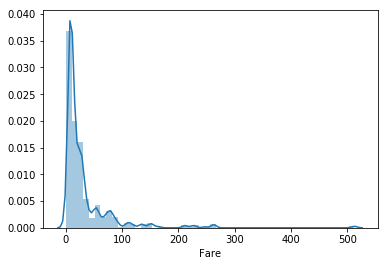

In [66]:
sns.distplot(X_train.Fare)

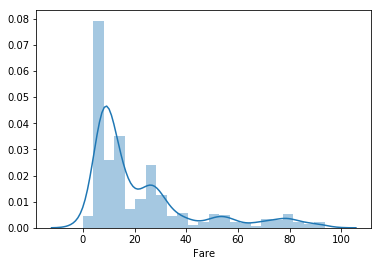

In [67]:
sns.distplot(X_train.Fare[X_train.Fare<100])

In [68]:
fare_condition = [
    X_train.Fare <20,
    X_train.Fare <= 40,
    X_train.Fare <= 100,
    X_train.Fare >100
]
fare_group = [1,2,3,4]

X_train['Fare'] = np.select(fare_condition, fare_group, 'Not Set')

In [83]:
X_test['Fare'].isnull().value_counts()

False    418
Name: Fare, dtype: int64

In [90]:
fare_condition_test = [
    X_test.Fare <20,
    X_test.Fare <= 40,
    X_test.Fare <= 100,
    X_test.Fare >100
]
fare_group_test = [1,2,3,4]
X_test['Fare'] = np.select(fare_condition_test, fare_group_test, 'Not Set')

In [91]:
X_test.head()

,Sex,Pclass,Fare
0,male,3,1
1,female,3,1
2,male,2,1
3,male,3,1
4,female,3,1


In [85]:
X_test.head()

,Sex,Pclass,Fare
0,male,3,7.8292
1,female,3,7.0000
2,male,2,9.6875
3,male,3,8.6625
4,female,3,12.2875


In [69]:
X_train[X_train.Fare=='Not Set']

,Sex,Pclass,Fare


In [70]:
X_train.head()

,Sex,Pclass,Fare
0,male,3,1
1,female,1,3
2,female,3,1
3,female,1,3
4,male,3,1


In [73]:
X_train = pd.get_dummies(X_train, columns = ['Sex'], drop_first = True)


In [75]:
X_train.head()

,Pclass,Fare,Sex_male
0,3,1,1
1,1,3,0
2,3,1,0
3,1,3,0
4,3,1,1


In [76]:
logreg = LogisticRegression(solver = 'liblinear',penalty = 'l1' )

In [96]:
X_train.head()

,Pclass,Fare,Sex_male
0,3,1,1
1,1,3,0
2,3,1,0
3,1,3,0
4,3,1,1


In [97]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [98]:
X_test = pd.get_dummies(X_test, columns = ['Sex'], drop_first = True)


KeyError: "None of [Index(['Sex'], dtype='object')] are in the [columns]"

In [94]:
logreg_l1 = pd.DataFrame({
    'PassengerId': test.PassengerId,
    'Survived': logreg.predict(X_test)
})

In [95]:
logreg_l1.to_csv('/Users/wzhang/GeneralAssembly/DAT-06-24/class material/Unit 3/Lesson 15/titanic/logreg_l1_v2.csv',
                     index = False)